<center>


<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>

## Proyecto Integrador
    

Alumno: Daniel Eduardo Vázquez Espinoza
    
Materia:  Ingeniería de Características


</center>

# Introduccion

Este documento tiene la finalidad de hacer que los datos cuenten una historia, para ello realizaron los siguientes objetivos:

* Descarga de informacion añadiendo un archivo de texto con informacion relevante de la descarga.
* Revision y analisis de los datos.
* Creacion de tablas tidy.
* Elaboracion de un dashboard.

# Historia a contar
El comportamiento de los delitos en Sonora antes y despues de pandemia, enfocado en los sigueintes puntos:

  * Municipios con mayor crecimiento delictivo en tiempos de covid.
  
 
  * Diferencia en la cantidad de delitos cometidos antes y despues del inicio de la pandemia.
  
  
    
  * Delitos con mayor incidencia por municipio y año.

# Descarga de los datos

In [1]:
#Librerias necesarias
import pandas as pd
import io
import urllib 
import datetime
import time
import os
#import sweetviz
import urllib.request
import zipfile
import seaborn as sns


En el siguiente bloque de codigo se descargaran los datos abiertos de Incidencia Delictiva por municipio, que puede encontrar en el siguiente [ENLACE](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published)


Creara una carpeta titulada con el nombre del archivo ademas de fecha y hora en que fue 
creada, en ella se encontraran:

* La informacion separada por años, del 2015 al 2022.
* Un archivo de texto que proporpocionara detalles de la descarga.

In [2]:
fechaactual = datetime.datetime.now().strftime("%d.%m.%Y_%H.%M")
subdir = "./data/VictimasVictimas_"+fechaactual
url='https://drive.google.com/u/0/uc?id=1wzbzND3FR_-mUUaH3crre7MlswlLcDB5&export=download&confirm=t&uuid=d0d45b18-6e74-440a-8acb-a46bd9db6146&at=ALAFpqzmlIuR3TqwOes80_SLwuZh:1667361872892'
archivo = 'IncidenciasDelictivas'
#Creacion de la carpeta almacenadora
os.makedirs(subdir)
urllib.request.urlretrieve(url, archivo + '.zip')  
with zipfile.ZipFile(archivo + '.zip', "r") as zip_ref:
            zip_ref.extractall(subdir)
 #Archivo con detalles de la descarga.       
file = open(subdir+"/Detalles.txt", "w")
file.write("Dentro de esta carpeta se encuentra la informacion de Incidencias delictivas por municipio entre los años 2015 y 2022"+ os.linesep)
file.write("Esta informacion fue descargada el dia ="+time.strftime("%x")+ os.linesep+"Hora"+time.strftime("%X")+ os.linesep)
file.write("Enlace de los datos : https://drive.google.com/u/0/uc?id=1wzbzND3FR_-mUUaH3crre7MlswlLcDB5&export=download&confirm=t&uuid=d0d45b18-6e74-440a-8acb-a46bd9db6146&at=ALAFpqzmlIuR3TqwOes80_SLwuZh:1667361872892" + os.linesep)
file.write("Pagina donde se encontro la informacio= https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published"+ os.linesep)
file.write("Publicado por: kymorales@secretariadoejecutivo.gob.mx  ")
file.close()
      
print("Descarga de 'Incidencia Delictiva' terminada.")

Descarga de 'Incidencia Delictiva' terminada.


In [3]:
#Cambiamos el directorio de trabajo a la carpeta acabamos de descargar
Ubi=subdir+"/Municipal-Delitos-2015-2022_sep2022"
os.chdir(Ubi)

In [4]:
#Leemos todas las tablas.
data_2015=pd.read_excel('2015.xlsx')
data_2016=pd.read_excel('2016.xlsx')
data_2017=pd.read_excel('2017.xlsx')
data_2018=pd.read_excel('2018.xlsx')
data_2019=pd.read_excel('2019.xlsx')
data_2020=pd.read_excel('2020.xlsx')
data_2021=pd.read_excel('2021.xlsx')
data_2022=pd.read_excel('2022.xlsx')

Analizamos la informacion de las tablas recien cargadas

In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

In [7]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241668 entries, 0 to 241667
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     241668 non-null  int64 
 1   Clave_Ent               241668 non-null  int64 
 2   Entidad                 241668 non-null  object
 3   Cve. Municipio          241668 non-null  int64 
 4   Municipio               241668 non-null  object
 5   Bien jurídico afectado  241668 non-null  object
 6   Tipo de delito          241668 non-null  object
 7   Subtipo de delito       241668 non-null  object
 8   Modalidad               241668 non-null  object
 9   Enero                   241668 non-null  int64 
 10  Febrero                 241668 non-null  int64 
 11  Marzo                   241668 non-null  int64 
 12  Abril                   241668 non-null  int64 
 13  Mayo                    241668 non-null  int64 
 14  Junio                   241668 non-n

In [8]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

In [9]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

In [10]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

In [11]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242844 entries, 0 to 242843
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242844 non-null  int64 
 1   Clave_Ent               242844 non-null  int64 
 2   Entidad                 242844 non-null  object
 3   Cve. Municipio          242844 non-null  int64 
 4   Municipio               242844 non-null  object
 5   Bien jurídico afectado  242844 non-null  object
 6   Tipo de delito          242844 non-null  object
 7   Subtipo de delito       242844 non-null  object
 8   Modalidad               242844 non-null  object
 9   Enero                   242844 non-null  int64 
 10  Febrero                 242844 non-null  int64 
 11  Marzo                   242844 non-null  int64 
 12  Abril                   242844 non-null  int64 
 13  Mayo                    242844 non-null  int64 
 14  Junio                   242844 non-n

In [12]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242942 entries, 0 to 242941
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Año                     242942 non-null  int64  
 1   Clave_Ent               242942 non-null  int64  
 2   Entidad                 242942 non-null  object 
 3   Cve. Municipio          242942 non-null  int64  
 4   Municipio               242942 non-null  object 
 5   Bien jurídico afectado  242942 non-null  object 
 6   Tipo de delito          242942 non-null  object 
 7   Subtipo de delito       242942 non-null  object 
 8   Modalidad               242942 non-null  object 
 9   Enero                   242942 non-null  int64  
 10  Febrero                 242942 non-null  int64  
 11  Marzo                   242942 non-null  int64  
 12  Abril                   242942 non-null  int64  
 13  Mayo                    242942 non-null  int64  
 14  Junio               

In [126]:
data_2015.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

# Diccionario de Datos


.
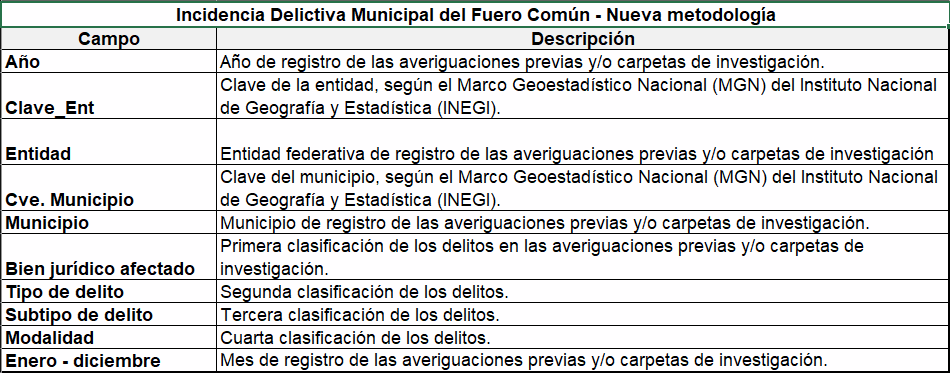

# Creacion de tablas utiles


Como se mostro anteriormente las tablas no contienen una columna de casos totales, despliegan la informacion por mes, por lo que se opto por crearla.

Primero reduciremos los datos, con el siguiente filtro seleccionaremos solo la informacion del estado de Sonora.

In [14]:
son_2015=data_2015[data_2015['Entidad']=='Sonora']
son_2015.head(1)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
133182,2015,26,Sonora,26001,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Se crea una variable con todas los nombres de los meses a sumar.
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
#Creamos una nueva columna con la suma horizontal de todos los meses.
son_2015['Delitos_Totales']= son_2015[meses].sum(axis=1).astype('int64')
son_2015.head(3)

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\4011924090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2015['Delitos_Totales']= son_2015[meses].sum(axis=1).astype('int64')


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
133182,2015,26,Sonora,26001,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
133183,2015,26,Sonora,26001,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0,0,0,0,0,0,0,0
133184,2015,26,Sonora,26001,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Creacion de tabla con solo las columnas utiles.
columnas=['Año', 'Municipio','Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito','Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio','Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre','Delitos_Totales']
#Eliminar los valores nulos para reducir la cantidad de filas.
son_2015_total= son_2015[son_2015['Delitos_Totales']!=0][columnas]
son_2015_total.head()

,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
133188,2015,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,0,0,0,0,0,0,0,0,0,0,0,1,1
133199,2015,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones culposas,No especificado,0,0,0,0,1,0,0,0,0,0,0,0,1
133217,2015,Aconchi,La libertad y la seguridad sexual,Violación simple,Violación simple,Violación simple,0,0,0,0,0,0,1,0,0,0,0,0,1
133224,2015,Aconchi,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,0,0,0,0,1,0,0,0,0,0,0,1
133255,2015,Aconchi,El patrimonio,Robo,Otros robos,Con violencia,0,0,0,0,0,0,0,0,0,0,0,1,1


Se realizaran los mismos ajustes en todos los datos de los años 2016 a 2022.

* Seleccionar solo datos de sonora
* Agregar una columna con la suma de las incidencias por delito.
* Eliminar los valores igual a cero.
* Guardar la tabla con cambios de forma local.

In [63]:
son_2016=data_2016[data_2016['Entidad']=='Sonora']
son_2016['Delitos_Totales']= son_2016[meses].sum(axis=1).astype('int64')
son_2016_total= son_2016[son_2016['Delitos_Totales']!=0][columnas]
son_2016_total.to_excel('son_2016_total.xlsx', index=False) 
son_2016_total.head(2)

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\2821357877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2016['Delitos_Totales']= son_2016[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
133193,2016,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con otro elemento,0,0,0,1,0,0,0,0,0,0,0,0,1
133194,2016,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,No especificado,0,0,1,0,0,1,0,0,0,0,0,0,2


In [64]:
son_2017=data_2017[data_2017['Entidad']=='Sonora']
son_2017['Delitos_Totales']= son_2017[meses].sum(axis=1).astype('int64')
son_2017_total= son_2017[son_2017['Delitos_Totales']!=0][columnas]
son_2017_total.to_excel('son_2017_total.xlsx', index=False) 
son_2017_total.head(2)

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\1450647768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2017['Delitos_Totales']= son_2017[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
185616,2017,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0,0,1
185618,2017,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,0,0,0,0,0,0,0,0,0,0,0,1,1


In [65]:
son_2018=data_2018[data_2018['Entidad']=='Sonora']
son_2018['Delitos_Totales']= son_2018[meses].sum(axis=1).astype('int64')
son_2018_total= son_2018[son_2018['Delitos_Totales']!=0][columnas]
son_2018_total.to_excel('son_2018_total.xlsx', index=False) 
son_2018_total.head(2) 

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\1484194547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2018['Delitos_Totales']= son_2018[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
186113,2018,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con otro elemento,0,0,0,0,0,0,0,0,0,1,0,0,1
186168,2018,Aconchi,El patrimonio,Robo,Robo de ganado,Sin violencia,2,0,0,0,0,0,0,0,1,0,1,0,4


In [67]:
son_2019=data_2019[data_2019['Entidad']=='Sonora']
son_2019['Delitos_Totales']= son_2019[meses].sum(axis=1).astype('int64')
son_2019_total= son_2019[son_2019['Delitos_Totales']!=0][columnas]
son_2019_total.to_excel('son_2019_total.xlsx', index=False) 
son_2019_total.head(2) 

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\2894231481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2019['Delitos_Totales']= son_2019[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
186113,2019,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con otro elemento,0,0,0,1,0,0,0,0,0,0,0,0,1
186133,2019,Aconchi,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,1,0,0,0,0,0,0,0,0,0,0,0,1


In [68]:
son_2020=data_2020[data_2020['Entidad']=='Sonora']
son_2020['Delitos_Totales']= son_2020[meses].sum(axis=1).astype('int64')
son_2020_total= son_2020[son_2020['Delitos_Totales']!=0][columnas]
son_2020_total.to_excel('son_2020_total.xlsx', index=False) 
son_2020_total.head(2) 

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\1703999033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2020['Delitos_Totales']= son_2020[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
186102,2020,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,0,0,0,0,1,0,0,0,1
186178,2020,Aconchi,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,0,0,0,0,0,0,0,0,1,0,0,0,1


In [69]:
son_2021=data_2021[data_2021['Entidad']=='Sonora']
son_2021['Delitos_Totales']= son_2021[meses].sum(axis=1).astype('int64')
son_2021_total= son_2021[son_2021['Delitos_Totales']!=0][columnas]
son_2021_total.to_excel('son_2021_total.xlsx', index=False) 
son_2021_total.head(2) 


C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\1658616914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2021['Delitos_Totales']= son_2021[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
186798,2021,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con arma blanca,0,0,0,0,1,0,0,0,0,0,0,0,1
186799,2021,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con otro elemento,0,0,4,5,0,0,2,0,2,1,2,0,16


In [70]:
son_2022=data_2022[data_2022['Entidad']=='Sonora']
son_2022['Delitos_Totales']= son_2022[meses].sum(axis=1).astype('int64')
son_2022_total= son_2022[son_2022['Delitos_Totales']!=0][columnas]
son_2022_total.to_excel('son_2022_total.xlsx', index=False) 
son_2022_total.head(2) 

C:\Users\vazqu\AppData\Local\Temp\ipykernel_3868\1198747028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_2022['Delitos_Totales']= son_2022[meses].sum(axis=1).astype('int64')


,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
186888,2022,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,1
186897,2022,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Con otro elemento,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1


Una vez tengamos toda la informacion por año limpia, se uniran todas para crear una tabla general.

In [71]:
full_anios=[son_2015_total,son_2016_total,son_2017_total,son_2018_total,son_2019_total,son_2020_total,son_2021_total,son_2022_total]
son_total = pd.concat(full_anios, axis=0).sort_values(['Año','Municipio']).reset_index(drop=True)
son_total.describe()


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
count,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,9728.000000,8573.000000,8573.000000,8573.000000,9728.000000
mean,2018.542660,1.806641,1.936061,2.273746,2.083162,2.226254,2.316715,2.084396,1.866674,2.038446,2.110813,1.858159,1.644932,23.579461
std,2.300681,9.388605,9.886163,11.979739,10.468847,11.008623,11.274007,9.624543,8.544516,9.114081,9.420151,8.820404,8.000971,105.930831
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,2022.000000,265.000000,345.000000,431.000000,399.000000,379.000000,436.000000,377.000000,281.000000,296.000000,303.000000,361.000000,233.000000,3128.000000


In [26]:
#Guardaremos de forma local la tabla general con la incidencia de todos los años
son_total.to_excel('son_total.xlsx', index=False) 

# Visualizacion y exploracion de la informacion

<AxesSubplot:xlabel='Año'>

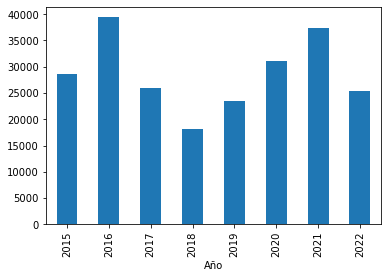

In [29]:
# Grafica de incidentes totales en Sonora al pasar de los años.
son_total.groupby("Año").sum()["Delitos_Totales"].plot.bar()

<AxesSubplot:xlabel='Año'>

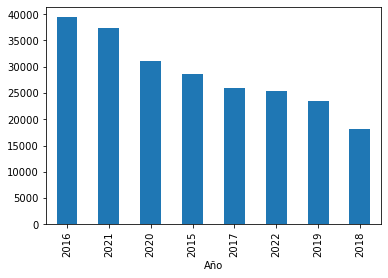

In [75]:
# Años con mayor indicencias.
son_total.groupby("Año").sum()["Delitos_Totales"].sort_values(ascending=False).plot.bar()

A continuacion se visualizaran los principales delitos en agrupado por dos años :
* 2015 y 2016
* 2017 y 2018
* 2019 y 2020
* 2020 y 2022

<AxesSubplot:ylabel='Subtipo de delito'>

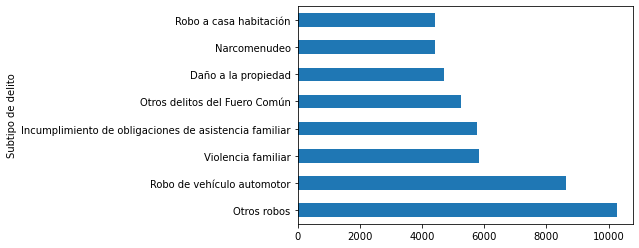

In [76]:
#2015 y 2016
son_total[(son_total["Año"]==2015) | (son_total["Año"]==2016)].groupby("Subtipo de delito").sum() ['Delitos_Totales'].sort_values(ascending=False).head(8).plot.barh()
          
          

<AxesSubplot:ylabel='Subtipo de delito'>

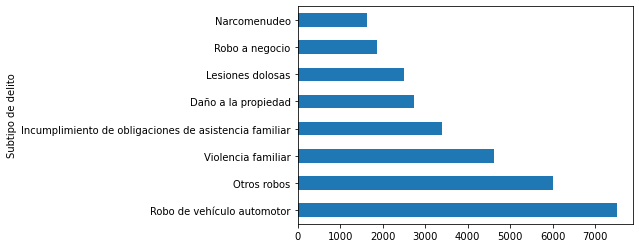

In [32]:
#2017 y 2018
son_total[(son_total["Año"]==2017) | (son_total["Año"]==2018)].groupby("Subtipo de delito").sum() ['Delitos_Totales'].sort_values(ascending=False).head(8).plot.barh()


<AxesSubplot:ylabel='Subtipo de delito'>

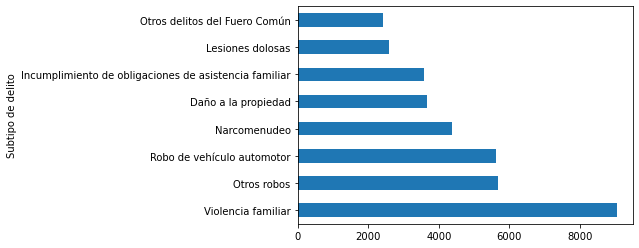

In [33]:
#2019 y 2020
son_total[(son_total["Año"]==2019) | (son_total["Año"]==2020)].groupby("Subtipo de delito").sum() ['Delitos_Totales'].sort_values(ascending=False).head(8).plot.barh()


<AxesSubplot:ylabel='Subtipo de delito'>

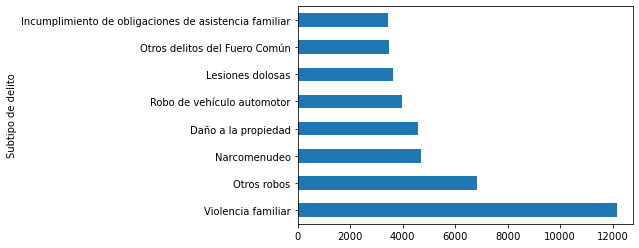

In [81]:
#2021 y 2022
son_total[(son_total["Año"]==2021) | (son_total["Año"]==2022)].groupby("Subtipo de delito").sum() ['Delitos_Totales'].sort_values(ascending=False).head(8).plot.barh()


In [88]:
#La tabla ap muestra solo los datos de fechas antes de pandemia.
ap=son_total[(son_total["Año"]==2015)| (son_total["Año"]==2016)| (son_total["Año"]==2017)| (son_total["Año"]==2018)| (son_total["Año"]==2019)]
ap_mun=ap.groupby("Municipio").sum() 
ap.head()

,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
0,2015,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1
1,2015,Aconchi,La vida y la Integridad corporal,Lesiones,Lesiones culposas,No especificado,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1
2,2015,Aconchi,La libertad y la seguridad sexual,Violación simple,Violación simple,Violación simple,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1
3,2015,Aconchi,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1
4,2015,Aconchi,El patrimonio,Robo,Otros robos,Con violencia,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1


In [89]:
#La tabla dp muestra solo los datos de fechas de pandemia.
dp=son_total[(son_total["Año"]==2020)| (son_total["Año"]==2021)| (son_total["Año"]==2022)]
dp_mun=dp.groupby("Municipio").sum() #agrupada por municipio
dp.head()

,Año,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos_Totales
5881,2020,Aconchi,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1
5882,2020,Aconchi,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1
5883,2020,Aconchi,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1
5884,2020,Aconchi,El patrimonio,Otros delitos contra el patrimonio,Otros delitos contra el patrimonio,Otros delitos contra el patrimonio,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1
5885,2020,Aconchi,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1


In [100]:
#Agrega el total de delitos dp en la tabla ap
ap_mun['dp_total']=dp_mun['Delitos_Totales'].astype('int64') 

#Cambiar el nombre de la columna 
ap_mun.rename(columns={'Delitos_Totales':'ap_total'},
               inplace=True)
#guardamos la nueva tabla con solo las dos columnas nuevas
apdpmun=ap_mun[['ap_total','dp_total']]
apdpmun.to_excel('apdpmun.xlsx')

In [102]:
#Utilizando la tabla recien creada podemos conocer 3 municipios con mayor crecimiento de incidencias en pandemia.
ap_mun = ap_mun.assign(dif = ap_mun['dp_total'] - ap_mun['ap_total'])
ap_mun['dif'].sort_values(ascending=False).head(3)

Municipio
Agua Prieta      1205.0
Guaymas           593.0
Benito Juárez     387.0
Name: dif, dtype: float64

<AxesSubplot:xlabel='Año'>

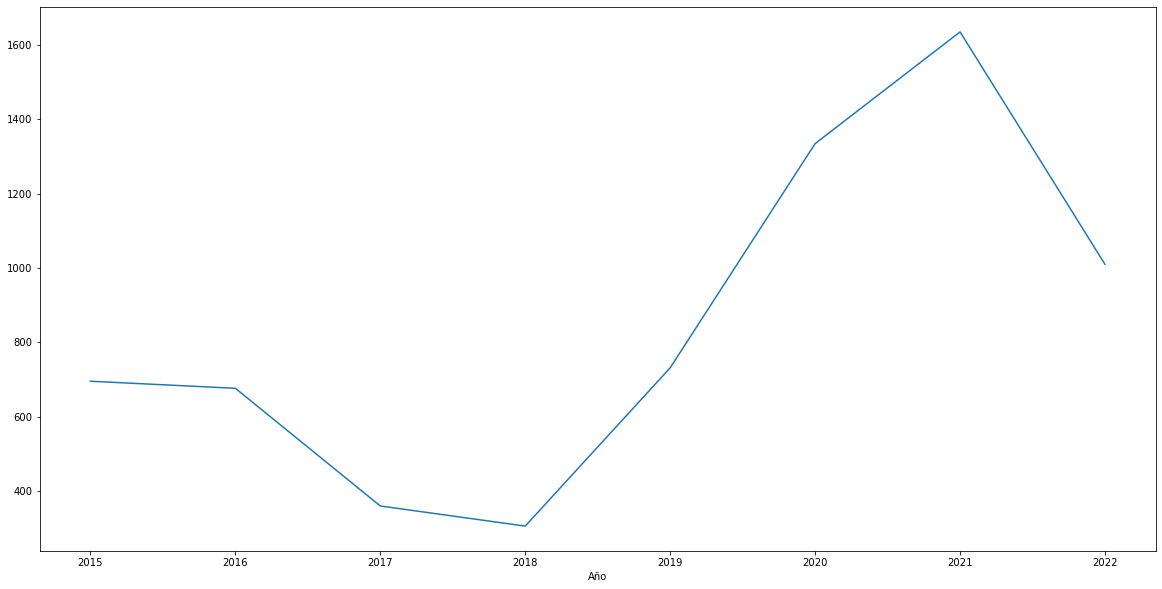

In [113]:
#Grafica de incidencias AGUA PRIETA
son_total[(son_total["Municipio"]=="Agua Prieta") ].groupby("Año").sum()['Delitos_Totales'].plot(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:xlabel='Año'>

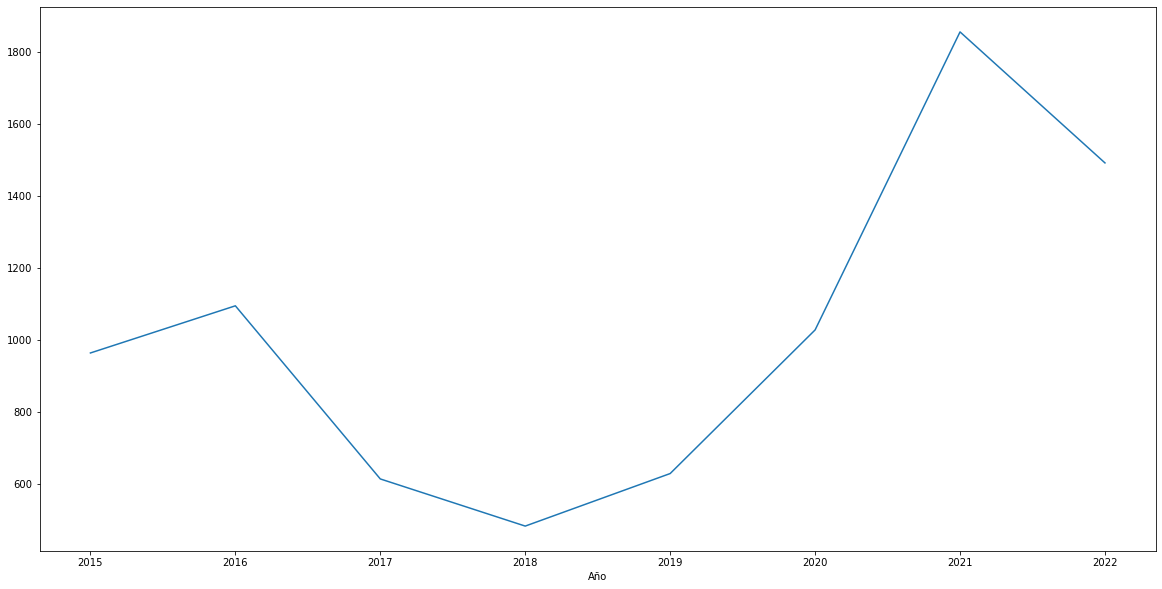

In [114]:
#Grafica de incidencias GUAYMAS
son_total[(son_total["Municipio"]=="Guaymas") ].groupby("Año").sum()['Delitos_Totales'].plot(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:xlabel='Año'>

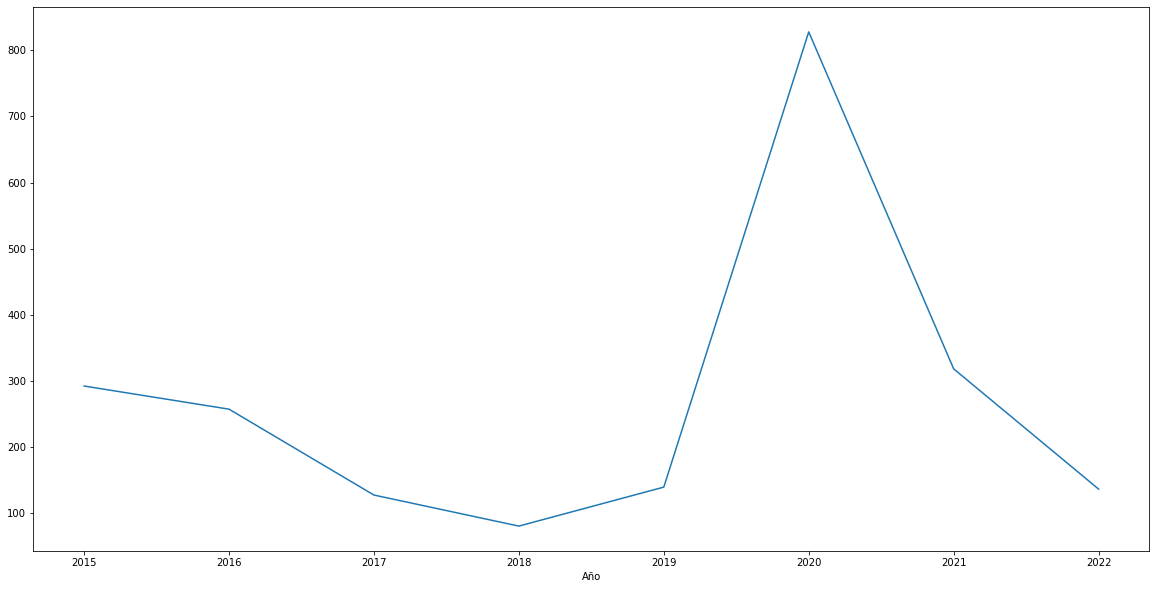

In [115]:
#Grafica de incidencias Benito Juárez
son_total[(son_total["Municipio"]=="Benito Juárez") ].groupby("Año").sum()['Delitos_Totales'].plot(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:ylabel='Subtipo de delito'>

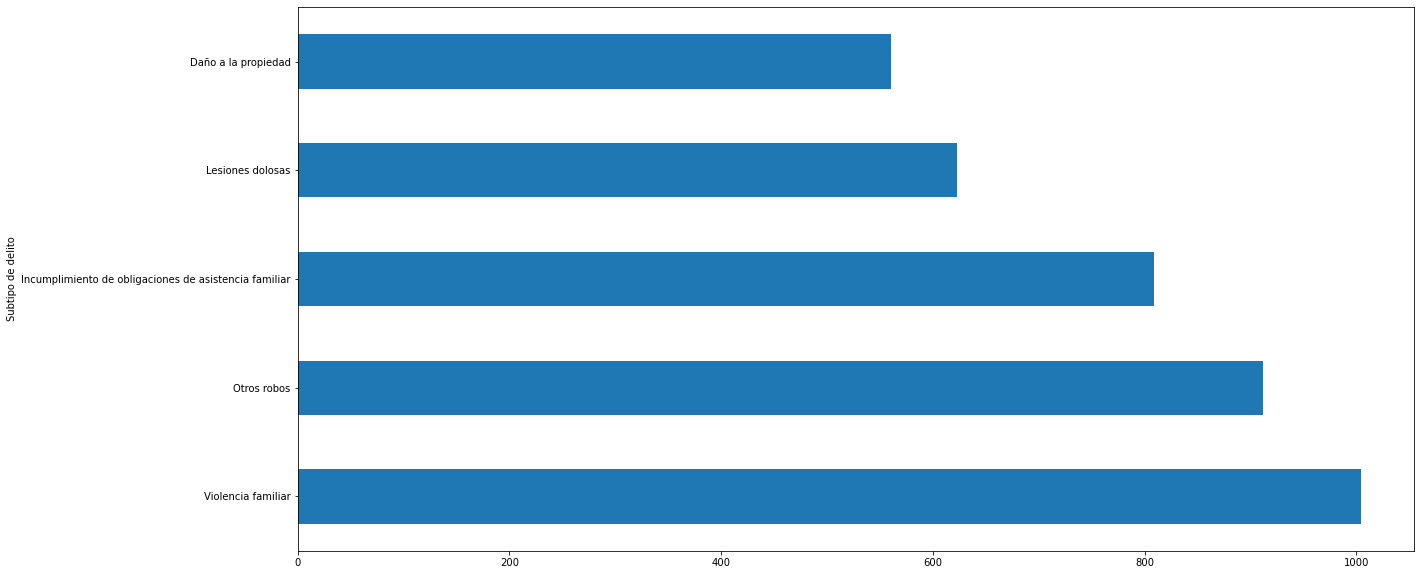

In [125]:
#principales delitos  agua prieta
son_total[(son_total["Municipio"]=="Agua Prieta")].groupby("Subtipo de delito").sum()['Delitos_Totales'].sort_values(ascending=False).head(5).plot.barh(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:xlabel='Año'>

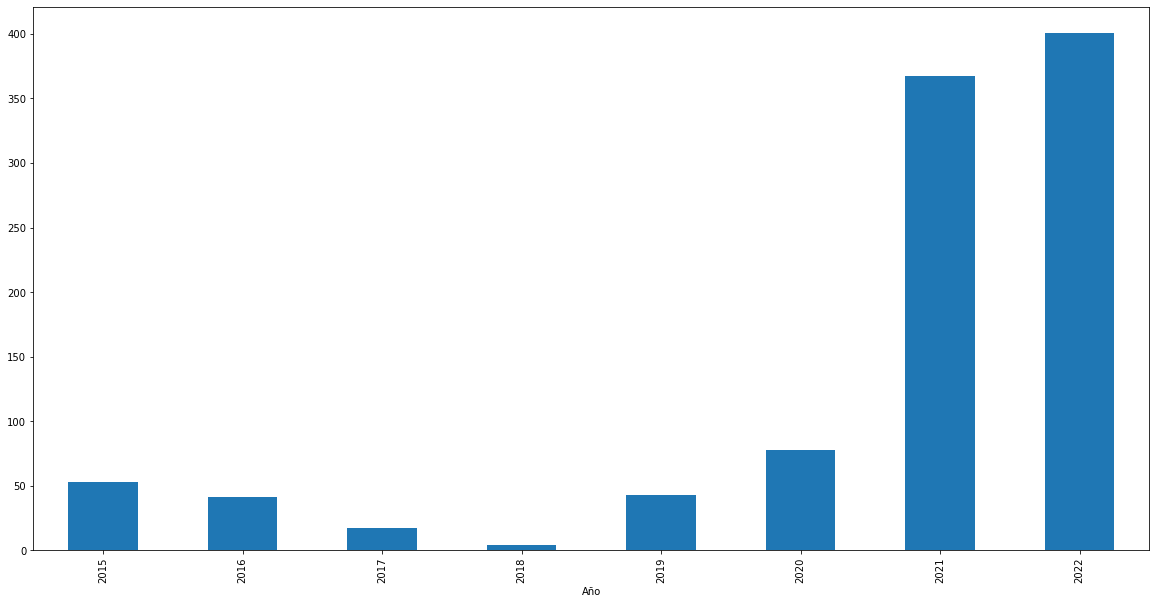

In [124]:
#Violencia Agua prieta
son_total[(son_total["Subtipo de delito"]=="Violencia familiar") & (son_total["Municipio"]=="Agua Prieta") ].groupby("Año").sum()['Delitos_Totales'].plot.bar(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:xlabel='Año'>

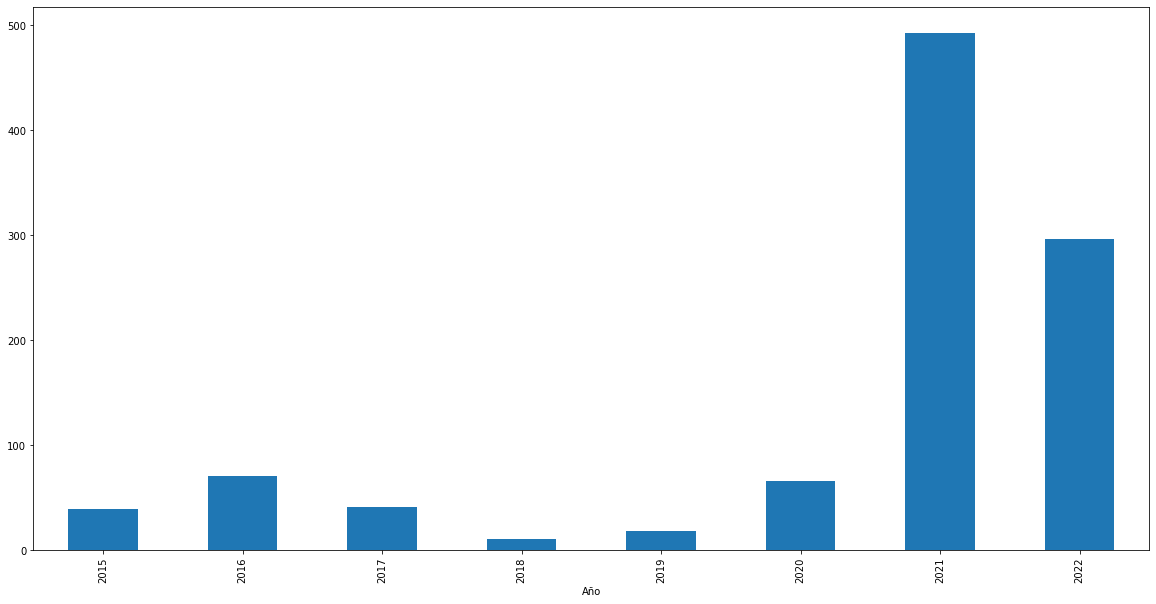

In [118]:
#violencia en guaymas
son_total[(son_total["Subtipo de delito"]=="Violencia familiar") & (son_total["Municipio"]=="Guaymas") ].groupby("Año").sum()['Delitos_Totales'].plot.bar(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:xlabel='Año'>

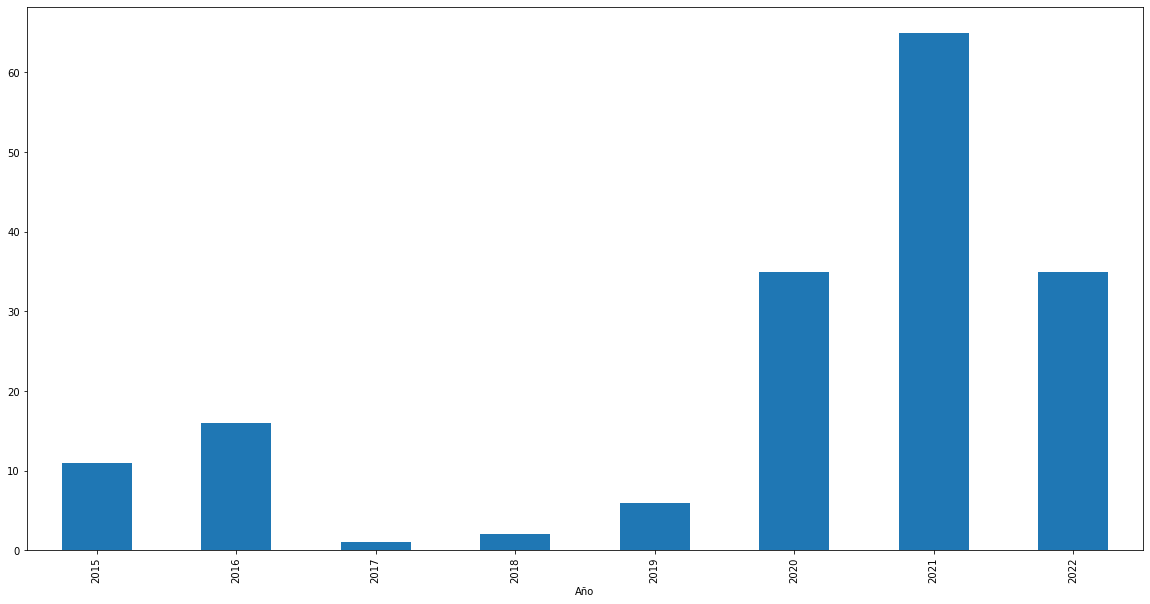

In [119]:
#violencia en Benito 
son_total[(son_total["Subtipo de delito"]=="Violencia familiar") & (son_total["Municipio"]=="Benito Juárez") ].groupby("Año").sum()['Delitos_Totales'].plot.bar(figsize=(20,10))   #.sort_values(ascending=False)


<AxesSubplot:ylabel='Subtipo de delito'>

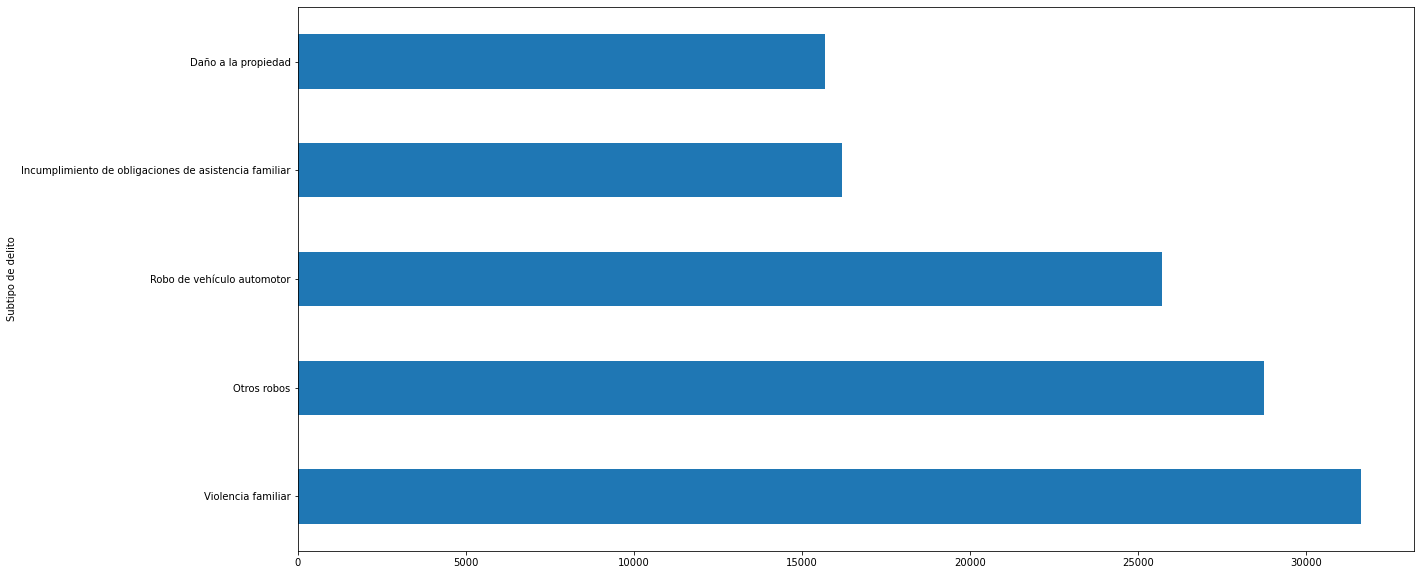

In [120]:
#Delitos con mayor incidencias en por municipio
sub_mes=son_total.groupby("Subtipo de delito").sum()['Delitos_Totales'].sort_values(ascending=False).head(5).plot.barh(figsize=(20,10))
sub_mes

In [121]:
#informacion de los 3 municipios con las incidencias delictivas antes de pandemia
tresap=ap[(ap["Municipio"]=='Guaymas')|(ap["Municipio"]=='Agua Prieta')|(ap["Municipio"]=='Benito Juárez')]
tresap=tresap[['Municipio','Subtipo de delito','Delitos_Totales']]
tresap=tresap.groupby(["Municipio","Subtipo de delito"]).sum()#['Delitos_Totales']
tresap

Delitos_Totales
Municipio   Subtipo de delito                      
Agua Prieta Aborto                                1
            Abuso de confianza                   21
            Abuso sexual                         77
            Allanamiento de morada               13
            Amenazas                             49
...                                             ...
Guaymas     Secuestro                             1
            Tráfico de menores                    1
            Violación equiparada                  6
            Violación simple                     26
            Violencia familiar                  180

[120 rows x 1 columns]

In [ ]:
tresap.to_excel('tresap.xlsx')

In [73]:
#informacion de los 3 municipios con las incidencias delictivas durante de pandemia
tresdp=dp[(dp["Municipio"]=='Guaymas')|(dp["Municipio"]=='Agua Prieta')|(dp["Municipio"]=='Benito Juárez')]
tresdp=tresdp[['Año','Municipio','Subtipo de delito','Delitos_Totales']]
tresdp=tresdp.groupby(["Municipio","Subtipo de delito"]).sum()#['Delitos_Totales']
tresdp

Año  Delitos_Totales
Municipio   Subtipo de delito                                   
Agua Prieta Aborto                         4041                3
            Abuso de confianza             6063               28
            Abuso sexual                   6063              110
            Acoso sexual                   6063               12
            Allanamiento de morada         6063               43
...                                         ...              ...
Guaymas     Robo en transporte individual  6065                3
            Secuestro                      4043                4
            Violación equiparada           6063               14
            Violación simple               6063               39
            Violencia familiar             6063              855

[128 rows x 2 columns]

In [123]:
tresdp.to_excel('tresdp.xlsx')

# TABLERO

Con las tablas creadas anteriormente se creo el dashboard utilizando datastudio, llamado ["Delitos en tiempo de pandemia"](https://datastudio.google.com/reporting/f1fe7344-bfb8-414e-9889-e8374a24ee5e)

En la primera pagina "Comportamiento Delictivo en Sonora" se encuentran fijas las tablas con informacion de Sonora en general, y con los filtros de Año,Municipio y Delito se puede tener la informacion mas precisa.

.
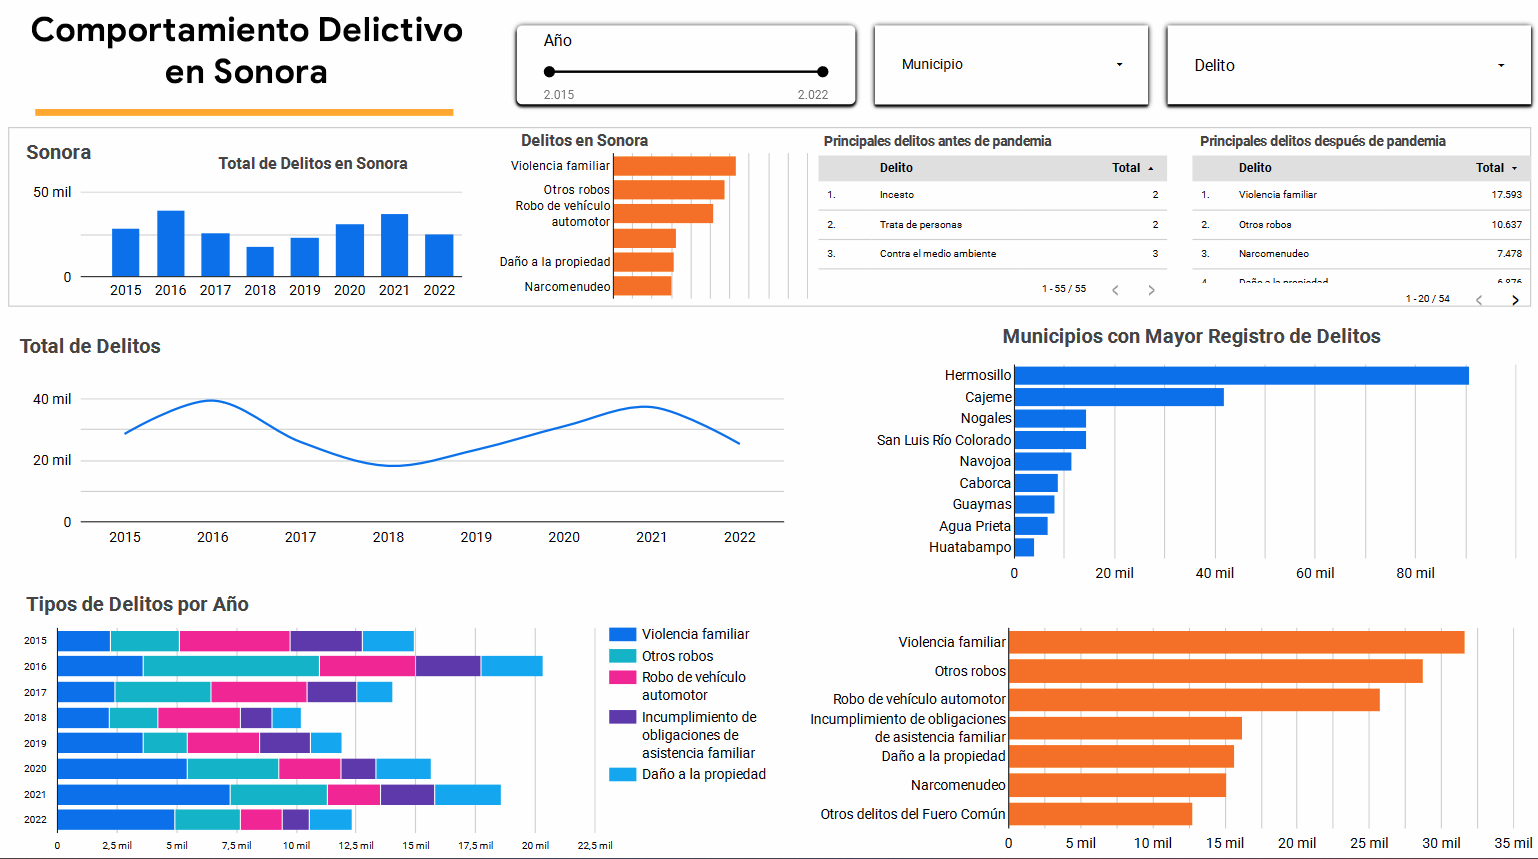

En la segunda pagina se encuentra de manera fija la informacion de los tres municipios con mayor crecimiento delictivo en tiempo de pandemia.

.


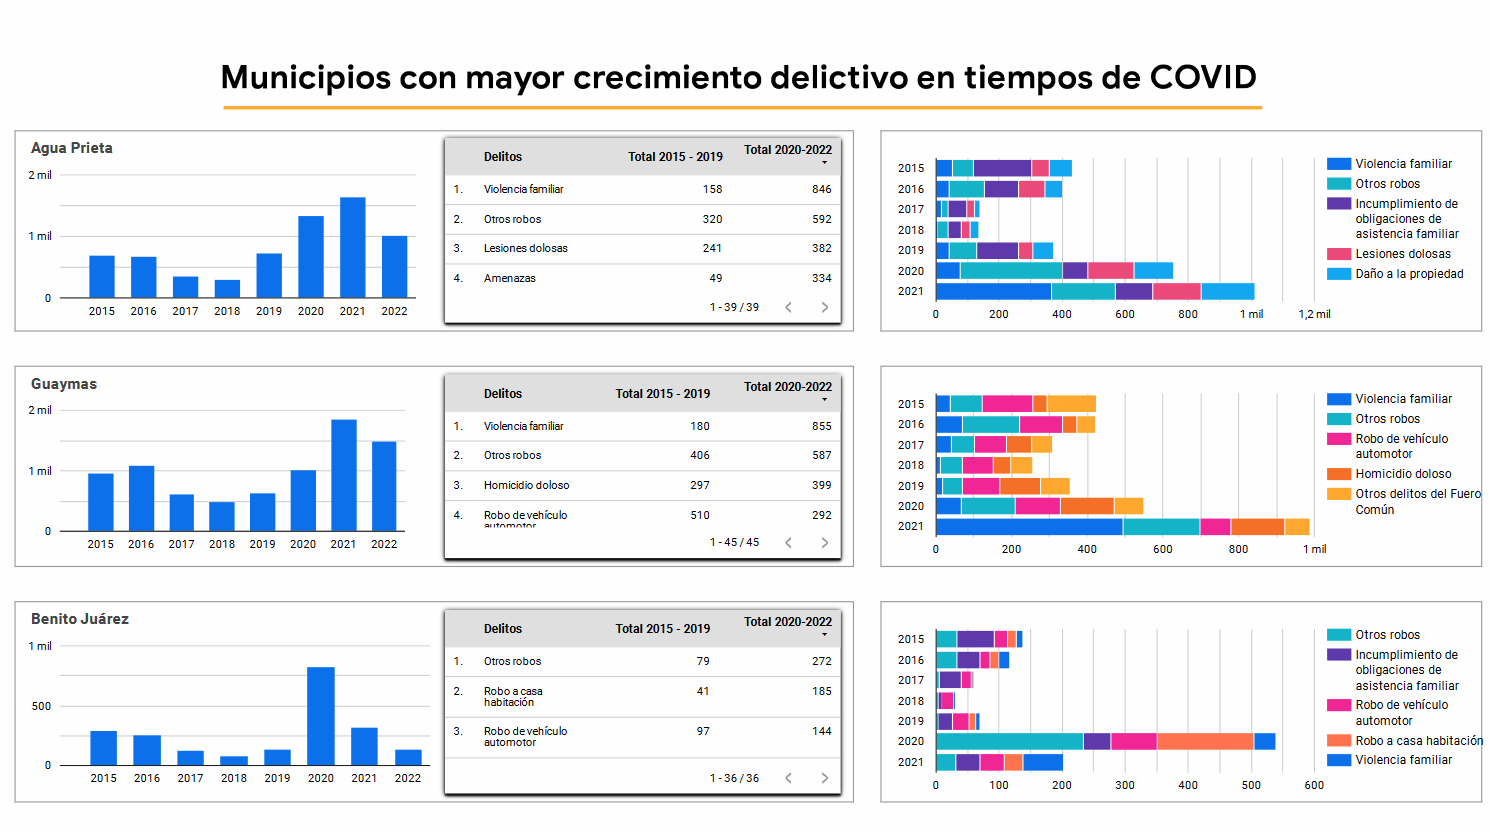